In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
threshold = 0.5
label = True # Fasle for correlation without label
binary_classify = True # False for multi-classify
data_path = "../data/data.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data = data.drop(columns=['No.', 'Full Name', 'Sample ID', 'Birth year', 'Gender'])

In [5]:
if not binary_classify:
    data = data.drop(columns=['Binary-label'])
data = data.drop(columns=['Multi-label'])

In [6]:
X_train = data.drop(columns=['Binary-label'])
y_train = data['Binary-label']

# Mutal Information

In [7]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [8]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=12).fit(X_train.fillna(0), y_train)
print('Selected top 12 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 12 features: Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8', 'D1_%CD19',
       'D2_Lympho', 'D2_Mono', 'D3_Q1_ naive', 'D3_Q1_ CD21 low', 'D4_Lympho',
       'D5_NK, CD69+', 'D6_Lympho'],
      dtype='object')


In [9]:
data_mul = data[(X_train.columns[k_best_features.get_support()])]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14fdb4f670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14fdbc8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14fdb10f70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14fdb28310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14fdb28670>,
 'means': []}

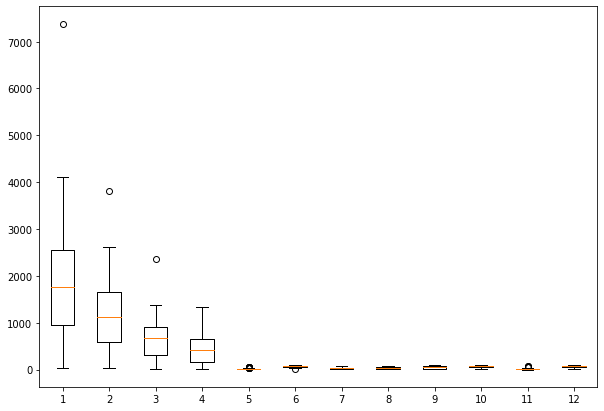

In [10]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(data_mul)

In [11]:
data_mul = pd.melt(data_mul,
               var_name="features",
               value_name="value")

/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 93.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:129

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'D1_Abs Lympho'),
  Text(1, 0, 'D1_Abs CD3'),
  Text(2, 0, 'D1_Abs CD4'),
  Text(3, 0, 'D1_Abs CD8'),
  Text(4, 0, 'D1_%CD19'),
  Text(5, 0, 'D2_Lympho'),
  Text(6, 0, 'D2_Mono'),
  Text(7, 0, 'D3_Q1_ naive'),
  Text(8, 0, 'D3_Q1_ CD21 low'),
  Text(9, 0, 'D4_Lympho'),
  Text(10, 0, 'D5_NK, CD69+'),
  Text(11, 0, 'D6_Lympho')])

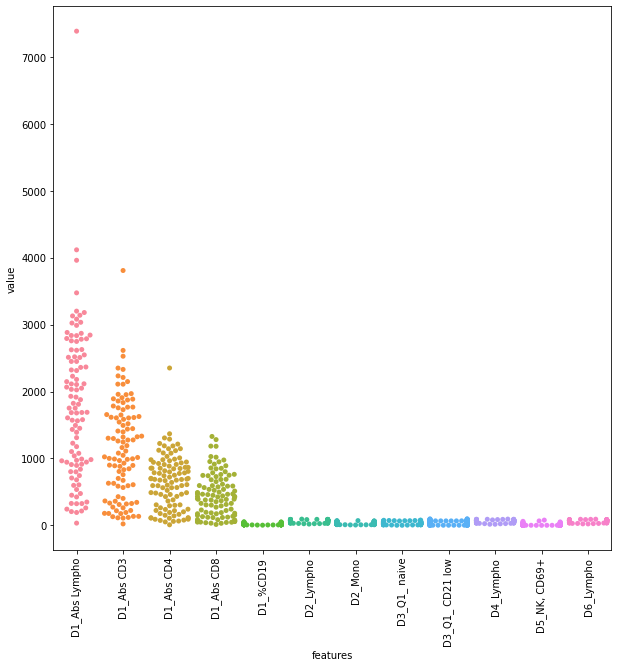

In [12]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", data=data_mul)

plt.xticks(rotation=90)

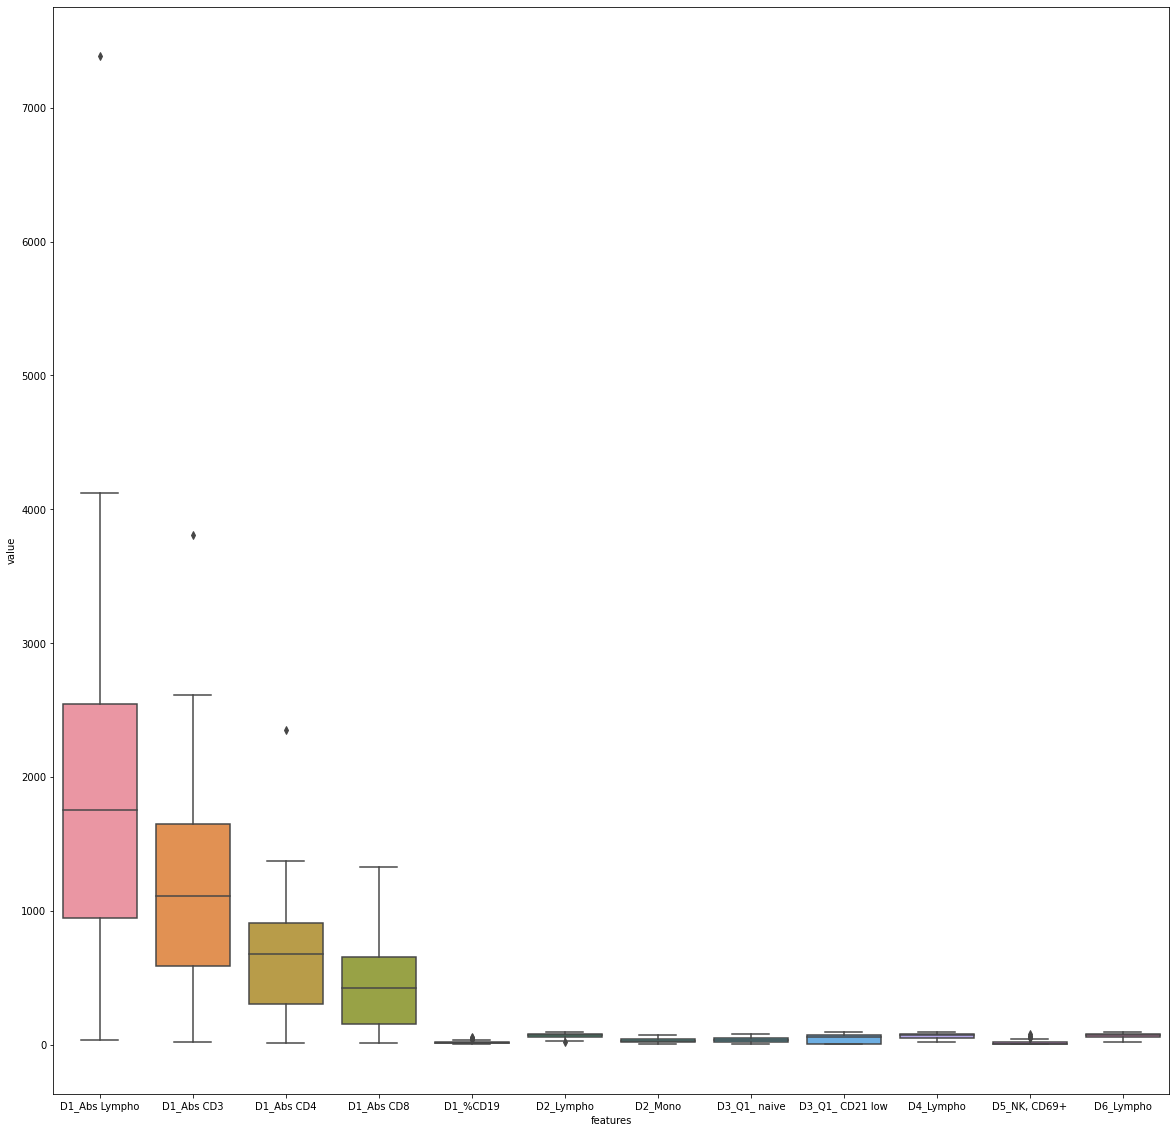

In [13]:
plt.figure(figsize=(20,20))
sns.boxplot(x='features', y='value', data=data_mul)
plt.show()

#  Information gain

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [15]:
model.fit(X_train, y_train)
df = pd.DataFrame({'Feature_names':X_train.columns, 'Importances':model.feature_importances_})

In [16]:
df

,Feature_names,Importances
0,D1_Abs Lympho,0.000000
1,D1_% CD3,0.000000
2,D1_Abs CD3,0.390256
3,D1_% CD4,0.000000
4,D1_Abs CD4,0.000000
...,...,...
90,D7_05:01:00,0.000000
91,D7_10:01:00,0.000000
92,D7_20:01:00,0.000000
93,D7_40:01:00,0.000000


In [17]:
in4_xy_given_x_is_Importances = df['Importances']

In [21]:
most_in4_values = in4_xy_given_x_is_Importances[abs(in4_xy_given_x_is_Importances)>0.01]
len(most_in4_values)

8

In [23]:
multi_cols = most_in4_values.index

In [24]:
features_df = df.iloc[multi_cols]

In [27]:
data_in4 = data[features_df.Feature_names]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14fb751f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f14fb6ef100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f14fb7513a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f14fb75db20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14fb75df70>,
 'means': []}

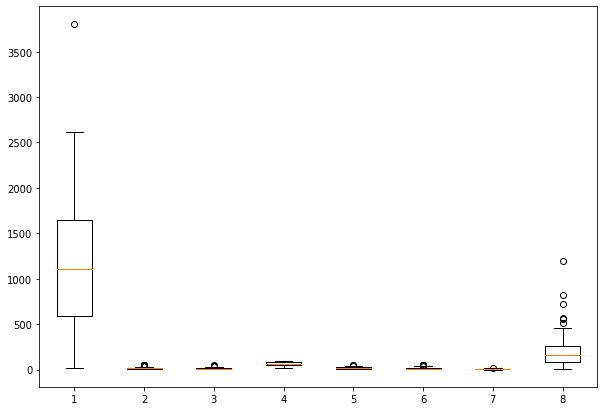

In [28]:
fig = plt.figure(figsize=(10,7))

plt.boxplot(data_in4)

In [29]:
data_in4 = pd.melt(data_in4,
               var_name="features",
               value_name="value")

/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pail/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:129

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'D1_Abs CD3'),
  Text(1, 0, 'D1_%CD19'),
  Text(2, 0, 'D2_B cells'),
  Text(3, 0, 'D3_Lympho'),
  Text(4, 0, 'D3_non-switched'),
  Text(5, 0, 'D3_Q1_ memory'),
  Text(6, 0, 'D4_CD4- CD8-'),
  Text(7, 0, 'D6_NKp30 BV605-A Median')])

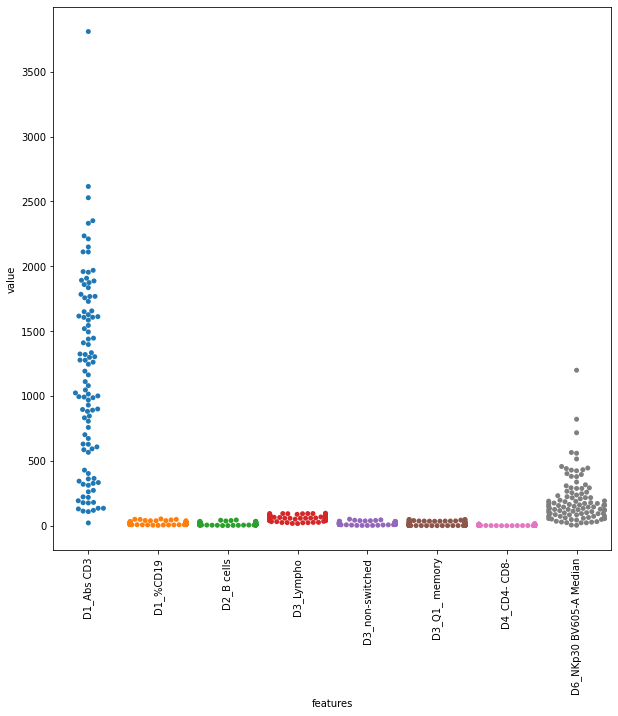

In [31]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", data=data_in4)

plt.xticks(rotation=90)

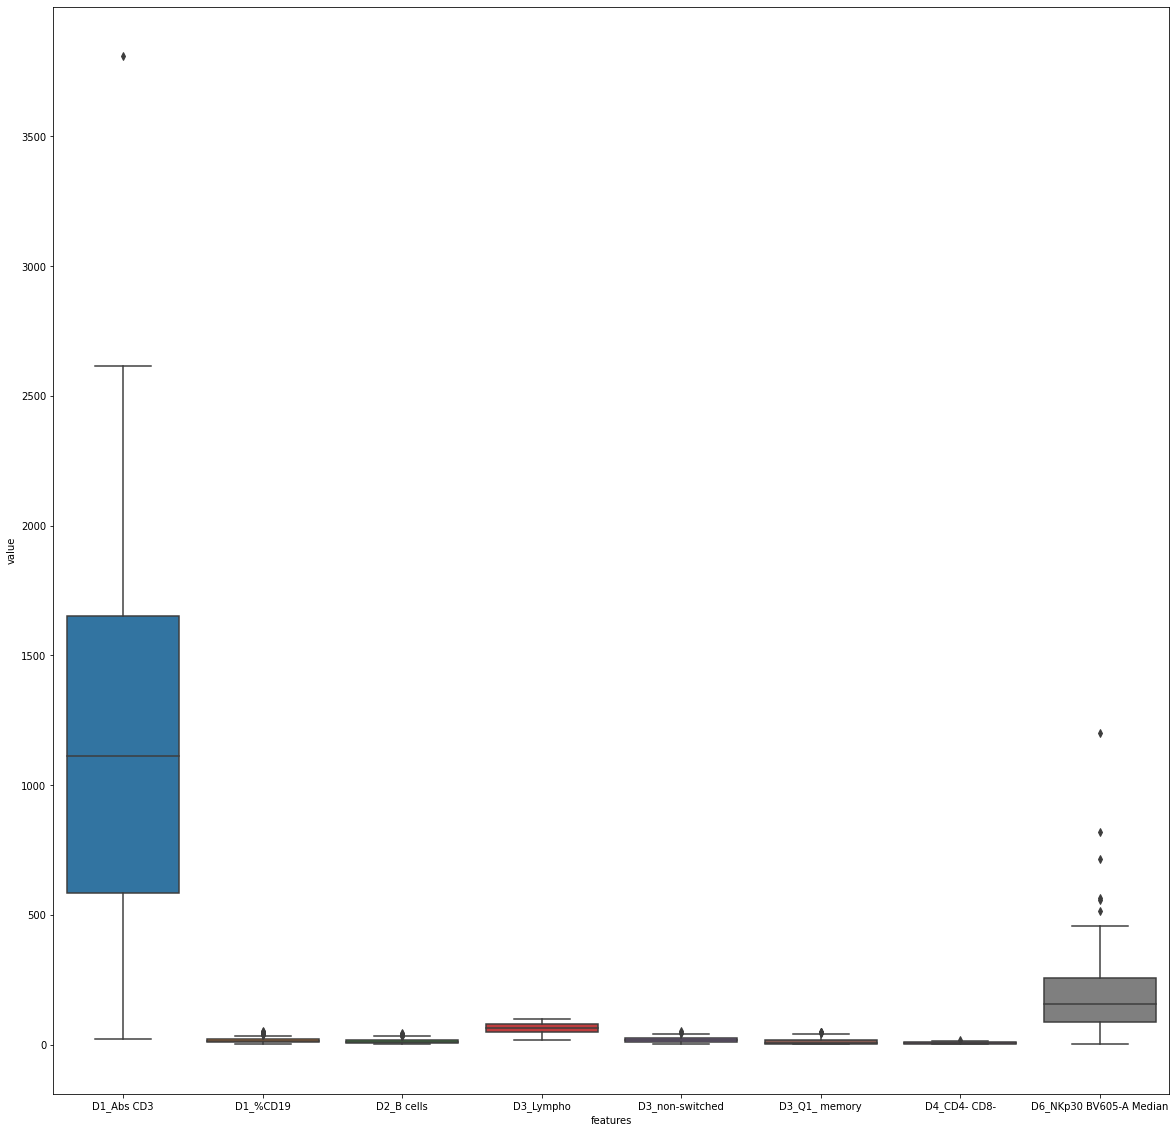

In [32]:
plt.figure(figsize=(20,20))
sns.boxplot(x='features', y='value', data=data_in4)
plt.show()